### Contrôle Continu - LU2PY222 : Modélisation Numérique en Physique
#### 5 mars 2025, 10h45 - 12h45

Vous rendrez sur Moodle un **compte-rendu** sous la forme d'un calepin **Jupyter** comprenant :
- vos codes python (bien commentés)
- vos graphiques (axes nommés et courbes légendées lorsque c'est nécessaire)
- les commentaires des résultats sous format Markdown lorsque c'est demandé

Vous avez le droit d'accéder à tous les calepins jupyter présents sur votre Hub, ainsi qu'à vos notes (manuscrites ou numériques) prises pendant les séances de travail de cette UE. L'accès à internet est limité aux sites de documentation **python**, **numpy** et **matplotlib**, et à Moodle. Vos documents numériques doivent être présents dans vos fichiers personnels Moodle. Les clés USB, smartphones et tablettes ne sont pas acceptées.

# Particule dans un cyclotron

Un cyclotron comporte trois parties, voir la figure ci-dessous. Les parties supérieure et inférieure, appelées "D" à cause de la forme de la trajectoire, sont plongées dans un champ magnétique.

![](Figure3.png)

Au temps $t_0=0$ **(ici le temps est sans unité)**, un proton est injecté au niveau du D inférieur sans vitesse. Une tension alternative est appliquée entre les D. Elle crée un champ électrique dont la direction et le sens sont toujours **similaires** à ceux de la vitesse du proton lorsqu’il est entre les D. Les instants $t_n$ où le proton sort des D (soit inférieur, soit supérieur, voir la figure) sont donnés, **sans unité**, par
$$t_n=n+\tau \sqrt{n}.$$
On choisit $\tau=0.5$. Le temps passé par le proton dans un D (supérieur ou inférieur) est toujours de $1$.
La trajectoire du proton est plane. On s’intéresse à sa vitesse. Ses composantes sont données, dans un repère et des unités appropriés, **en fonction de sa position dans le cyclotron:**
1) Pour $t$ variant de $t_n$ à $t_{n+1}-1$ c’est-à-dire quand il est entre les D :
$$
v_x(t) = 0  \qquad  v_y(t) = \epsilon_n \left( \sqrt{n} + (t-t_n)/\tau \right)
$$
2) Pour $t$ variant de $t_{n+1}-1$ à $t_{n+1}$ c’est-à-dire quand il est dans D supérieur ou D inférieur.
$$
v_x(t) = \epsilon_n \sqrt{n+1} \sin \left( \pi (t-t_{n+1}) \right) \qquad v_y(t) = -\epsilon_n \sqrt{n+1} \cos \left( \pi (t-t_{n+1}) \right)
$$

Dans ces expressions, $\epsilon_n$ vaut $1$ pour $n$ pair et $-1$ pour $n$ impair. On pourra prendre $\epsilon_n = (-1)^n$.

## Partie I

1. Créer un tableau contenant les instants de sortie des boucles "D" : $t_0$, $t_1$, ... jusqu'à $t_{50}$ inclus. 
2. Vérifier que $t_1=1.5$, $t_4=5$, $t_9=10.5$, $t_{16}=18$, et $t_{25}=27.5$ avec des opérateurs booléens.
3. Calculer les valeurs de $v_x$ et $v_y$ en fonction du temps pour $t$ variant de $t_2−1$ à $t_2$. Vous utiliserez un échantillonage suffisant pour le temps $t$, dans un tableau distinct de celui de la question précédente. Faire de même pour $t$ variant de $t_4-1$ à $t_4$. 
4. Représenter dans un graphique $v_x$ et $v_y$ en fonction de $t$ pour $t$ variant de $t_2-1$ a $t_2$. Faire de même pour $t$ variant de $t_4-1$ à $t_4$.
5. Déterminer des valeurs approchées des maxima de $v_x$ et $v_y$ pour $t$ variant de $t_2-1$ à $t_2$, ainsi que les instants $t$ correspondants. Un maximum peut être en bord d'intervalle. Faire de même pour $t$ variant de $t_4-1$ à $t_4$. Commenter.

In [109]:
import numpy as np
import matplotlib.pyplot as plt

#on initialise les paramètres
tau = 0.5

def t_sortie(n, tau):
    """fonction qui renvoie l'instant t_n ou ke proton sort sort d'un D"""
    return n + tau*np.sqrt(n)

instant_sorties = np.array([t_sortie(i, tau) for i in range(50)])
#tableau de tous les instants de sorties pour 50 D

In [110]:
print(instant_sorties[1] == 1.5)
print(instant_sorties[4] == 5)
print(instant_sorties[9] == 10.5)
print(instant_sorties[16] ==  18)
print(instant_sorties[25] == 27.5)
#on vérifie si les valeurs du tableaux sont bien les valeurs attendues

True
True
True
True
True


**On définit les fonctions vitesse (en x et en y) dans les intervalles de temps considérés**. On utilise la formule avec $n = 1$ pour $t$ dans $[t_{2}-1$, $t_{2}]$ et $n = 3$ pour $t$ dans $[t_{4}-1$, $t_{4}]$ :

In [111]:
t2 = np.linspace(instant_sorties[2]-1, instant_sorties[2], 100)
#tableau des instants t compris entre t_2 -1 et t_2


def v_x_t2(t):
    return -np.sqrt(2)*np.sin(np.pi*(t-instant_sorties[2]))

def v_y_t2(t):
    return np.sqrt(2)*np.cos(np.pi*(t-instant_sorties[2]))

v_x_2 = np.array([v_x_t2(t) for t in t2])
v_y_2 = np.array([v_y_t2(t) for t in t2])

In [113]:
t4 = np.linspace(instant_sorties[4]-1, instant_sorties[4], 100)

def v_x_t4(t):
    return -np.sqrt(3)*np.sin(np.pi*(t-instant_sorties[4]))

def v_y_t4(t):
    return np.sqrt(3)*np.cos(np.pi*(t-instant_sorties[4]))

v_x_4 = np.array([v_x_t4(t) for t in t4])
v_y_4 = np.array([v_y_t4(t) for t in t4])

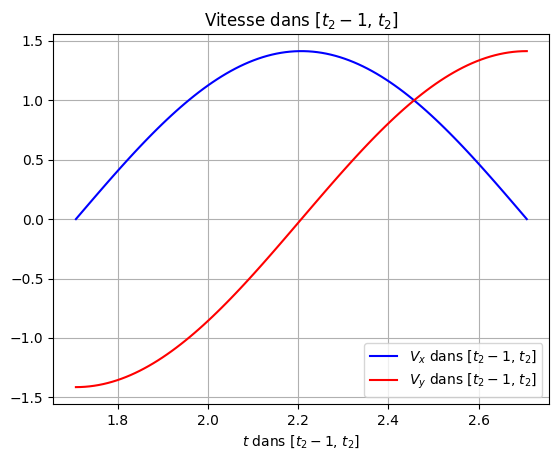

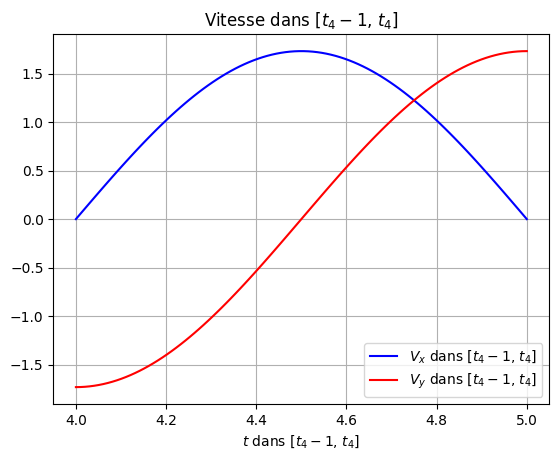

In [114]:
plt.plot(t2, v_x_2, 'b', label = '$V_{x}$ dans [$t_{2}-1$, $t_{2}$]')
plt.plot(t2, v_y_2, 'r', label = '$V_{y}$ dans [$t_{2}-1$, $t_{2}$]')
plt.xlabel('$t$ dans [$t_{2}-1$, $t_{2}$]')
plt.title("Vitesse dans [$t_{2}-1$, $t_{2}$]")
plt.legend()
plt.grid()
plt.show()

plt.plot(t4, v_x_4, 'b', label = '$V_{x}$ dans [$t_{4}-1$, $t_{4}$]')
plt.plot(t4, v_y_4, 'r', label = '$V_{y}$ dans [$t_{4}-1$, $t_{4}$]')
plt.xlabel('$t$ dans [$t_{4}-1$, $t_{4}$]')
plt.title("Vitesse dans [$t_{4}-1$, $t_{4}$]")
plt.legend()
plt.grid()
plt.show()

In [123]:
vx_max_2 = np.max(v_x_2)
vy_max_2 = np.max(v_y_2)

vx_max_4 = np.max(v_x_4)
vy_max_4 = np.max(v_x_4)

t2_vx_max = t2[np.argmax(v_x_2)]
t2_vy_max = t2[np.argmax(v_y_2)]
t4_vx_max = t4[np.argmax(v_x_4)]
t4_vy_max = t4[np.argmax(v_y_4)]

print(f'vx_max_2 = {vx_max_2:.4}, t correspondant = {t2_vx_max:.3}\nvy_max_2 = {vy_max_2:.4}, t correspondant = {t2_vy_max:.3} et t_{2} = {instant_sorties[2]:.3}')     
print(f'vx_max_4 = {vx_max_4:.4}, t correspondant = {t4_vx_max:.3}\nvy_max_4 = {vy_max_4:.4}, t correspondant = {t4_vy_max:.3} et t_{4} = {instant_sorties[4]:.3}')
print(f"instant t au milieu de la spire D 2 = {instant_sorties[2] - 1/2:.2}")
print(f"instant t au milieu de la spire D 4 = {instant_sorties[4] - 1/2:.2}")

vx_max_2 = 1.414, t correspondant = 2.2
vy_max_2 = 1.414, t correspondant = 2.71 et t_2 = 2.71
vx_max_4 = 1.732, t correspondant = 4.49
vy_max_4 = 1.732, t correspondant = 5.0 et t_4 = 5.0
instant t au milieu de la spire D 2 = 2.2
instant t au milieu de la spire D 4 = 4.5


**La vitesse selon l'axe y est maximale lorsque le proton sort des parties `D`, tandis que la vitesse selon x est maximale à mi chemin sur la spire**

## Partie II
6. Représenter $v_x$ et $v_y$ en fonction de $t$ pour $t$ variant de $0$ à $t_6$. On utilisera une couleur unique pour la courbe par morceaux. On remarque que $v_x$ et $v_y$ sont des fonctions continues du temps $t$. Commenter.
7. Représenter le module de la vitesse $\sqrt{v_x^2+v_y^2}$ en fonction de $t$ pour $t$ variant de $0$ à $t_6$. On utilisera une couleur unique pour la courbe par morceaux. Commenter. A quoi sert un cyclotron ?
8. Pour $n$ variant de $0$ à $50$, représenter le module de la vitesse $\sqrt{v_x(t_n)^2+v_y(t_n)^2}$ en fonction de $t_n-n$, qui est le temps total passé par le proton entre les D à l'instant $t_n$. Commenter.

**On définit la vitesse selon x et celle selon y dans le cas générale grâce à la formule**

In [126]:
def v_x(t, n):
    if t >= instant_sorties[n] and t < instant_sorties[n+1] - 1:
        return 0
    elif t >= instant_sorties[n+1] - 1 and t <= instant_sorties[n+1]:
        return (-1)**n*np.sqrt(n+1)*np.sin(np.pi*(t-instant_sorties[n]))
    
def v_y(t, n):
    if t >= instant_sorties[n] and t < instant_sorties[n+1] - 1:
        return (-1)**n*(np.sqrt(n)+(t-instant_sorties[n])/tau)
    elif t >= instant_sorties[n+1] - 1 and t <= instant_sorties[n+1]:
        return -(-1)**n*np.sqrt(n+1)*np.cos(np.pi*(t-instant_sorties[n]))

In [127]:
echantillon_t_dans_chaque_n = 100
t_6 = np.linspace(instant_sorties[0], instant_sorties[6], 6*echantillon_t_dans_chaque_n)

v_x_6 = np.ones((6, echantillon_t_dans_chaque_n))
v_y_6 = np.ones((6, echantillon_t_dans_chaque_n))
module = np.ones((6, echantillon_t_dans_chaque_n))

for n in range(6):
    t_n = np.linspace(instant_sorties[n], instant_sorties[n+1], echantillon_t_dans_chaque_n)
    for i, t in enumerate(t_n):
        v_x_6[n][i] = v_x(t, n)
        v_y_6[n][i] = v_y(t, n)
        module[n][i] = np.sqrt(v_x(t, n)**2 + v_y(t, n)**2)
    

v_x_6 = np.reshape(v_x_6, -1)
v_y_6 = np.reshape(v_y_6, -1)
module = np.reshape(module, -1)

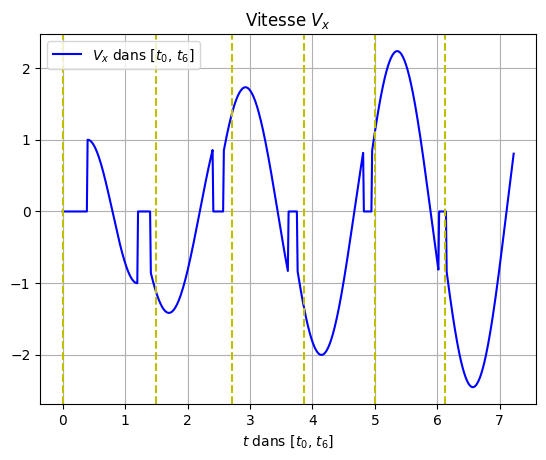

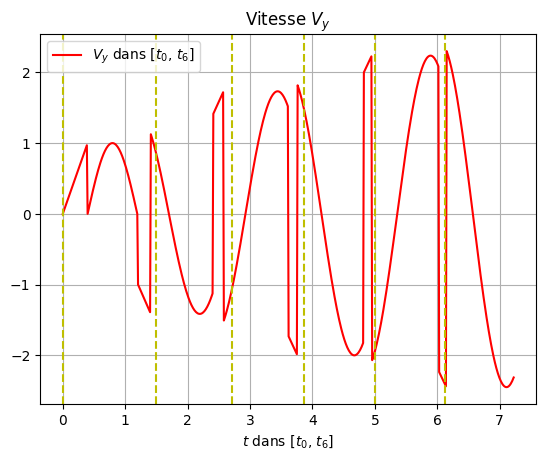

In [128]:
plt.plot(t_6, v_x_6, 'b', label = '$V_{x}$ dans [$t_{0}$, $t_{6}$]')
plt.axvline(instant_sorties[0], color='y', linestyle = '--')
plt.axvline(instant_sorties[1], color='y', linestyle = '--')
plt.axvline(instant_sorties[2], color='y', linestyle = '--')
plt.axvline(instant_sorties[3], color='y', linestyle = '--')
plt.axvline(instant_sorties[4], color='y', linestyle = '--')
plt.axvline(instant_sorties[5], color='y', linestyle = '--')
plt.xlabel('$t$ dans [$t_{0}$, $t_{6}$]')
plt.title("Vitesse $V_{x}$")
plt.legend()
plt.grid()
plt.show()

plt.plot(t_6, v_y_6, 'r', label = '$V_{y}$ dans [$t_{0}$, $t_{6}$]')
plt.axvline(instant_sorties[0], color='y', linestyle = '--')
plt.axvline(instant_sorties[1], color='y', linestyle = '--')
plt.axvline(instant_sorties[2], color='y', linestyle = '--')
plt.axvline(instant_sorties[3], color='y', linestyle = '--')
plt.axvline(instant_sorties[4], color='y', linestyle = '--')
plt.axvline(instant_sorties[5], color='y', linestyle = '--')
plt.xlabel('$t$ dans [$t_{0}$, $t_{6}$]')
plt.title("Vitesse $V_{y}$")
plt.legend()
plt.grid()
plt.show()

**On a utilisé le fait que les vitesses sont des fonctions continues en mettant des inégalités larges dans les conditions sur t dans les fonctions V_x et V_y au lieu de mettre des inégalités strictes. On remarque que les fonctions sont sinusoïdales mais d'amplitudes croissantes avec le temps, sauf sur les parties entre les spires `D` où les fonctions se comportent différamment.**

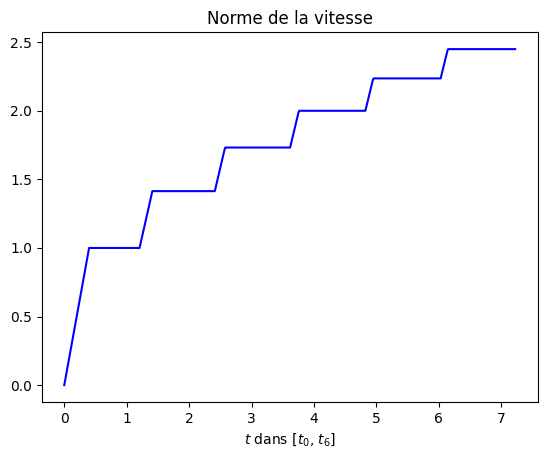

In [129]:
plt.plot(t_6, module, 'b', label = '$V$ dans [$t_{0}$, $t_{6}$]')
plt.xlabel('$t$ dans [$t_{0}$, $t_{6}$]')
plt.title("Norme de la vitesse")
plt.show()

**On voit bien que la norme de la vitesse de fait qu'augmenter. Un cyclotron est un accélérateur de particule ciculaire.**

In [136]:
v_x_tot = np.ones((50, echantillon_t_dans_chaque_n))
v_y_tot = np.ones((50, echantillon_t_dans_chaque_n))

for n in range(49):
    t_n = np.linspace(instant_sorties[n], instant_sorties[n+1], echantillon_t_dans_chaque_n)
    for i, t in enumerate(t_n):
        v_x_tot[n][i] = v_x(t, n)
        v_y_tot[n][i] = v_y(t, n)

v_x_tot = np.reshape(v_x_tot, -1)
v_y_tot = np.reshape(v_y_tot, -1)
module_tot = np.sqrt(v_x_tot**2 + v_y_tot**2)

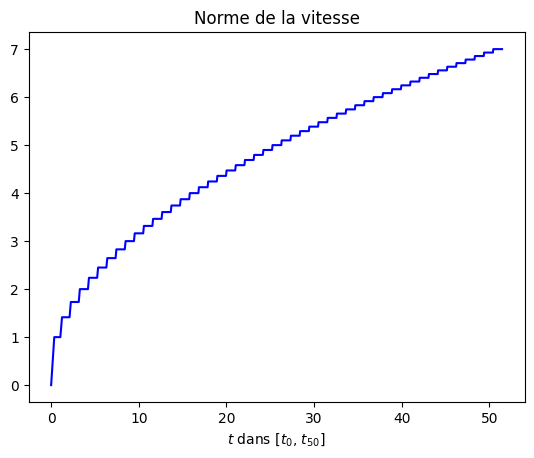

In [141]:
t_tot = np.linspace(instant_sorties[0], instant_sorties[49], 5000)

plt.plot(t_tot[:-100], module_tot[:-100], 'b', label = '$V$ dans [$t_{0}$, $t_{50}$]')
plt.xlabel('$t$ dans [$t_{0}$, $t_{50}$]')
plt.title("Norme de la vitesse")
plt.show()